In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-05-04 16:53:10,763 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-05-04 16:53:11,312 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-05-04 16:53:11,367 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-05-04 16:53:12,958 - utils.dataframe - INFO - 52885 winners assigned to player 1
2025-05-04 16:53:12,959 - utils.dataframe - INFO - 52848 winners assigned to player 2
2025-05-04 16:53:13,268 - data_processing.feature_engineering - INFO - Applying feature engineering


In [72]:
# columns_to_remove = [
#     "player_1_entry_W", "player_2_entry_W", "player_1_entry_UP", "player_2_entry_UP",
#     "player_1_entry_ITF", "player_2_entry_ITF", "player_1_entry_ALT",
#     "player_2_entry_ALT", "player_1_entry_Alt", "player_2_entry_Alt",
#     "player_1_entry_SE", "player_2_entry_SE", "player_1_entry_PR",
#     "player_2_entry_PR", "tourney_level_F", "player_1_entry_LL",
#     "player_2_entry_LL", "tourney_level_O"
# ]
# df = df.drop(columns=[column for column in columns_to_remove])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 96 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   player_1_id                 105733 non-null  int64  
 1   player_1_seed               105733 non-null  float64
 2   player_1_ht                 105733 non-null  float64
 3   player_1_ioc                105733 non-null  int64  
 4   player_1_age                105733 non-null  float64
 5   player_1_rank               105733 non-null  float64
 6   player_1_rank_points        105733 non-null  float64
 7   player_1_entry_ALT          105733 non-null  bool   
 8   player_1_entry_Alt          105733 non-null  bool   
 9   player_1_entry_ITF          105733 non-null  bool   
 10  player_1_entry_LL           105733 non-null  bool   
 11  player_1_entry_PR           105733 non-null  bool   
 12  player_1_entry_Q            105733 non-null  bool   
 13  player_1_entry_SE  

In [74]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [75]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False)

In [76]:
x_train.tail()

player_1_id  player_1_seed  player_1_ht  player_1_ioc  player_1_age  \
102554       209414          0.500        178.0            10          19.5   
102555       209406          0.125        180.0            95          20.0   
102556       210506          0.250        193.0             2          19.2   
102557       209406          0.125        180.0            95          20.0   
102558       209406          0.125        180.0            95          20.0   

        player_1_rank  player_1_rank_points  player_1_entry_ALT  \
102554       0.014286                 756.0               False   
102555       0.005405                 326.0               False   
102556       0.010309                 653.0               False   
102557       0.005405                 326.0               False   
102558       0.005405                 326.0               False   

        player_1_entry_Alt  player_1_entry_ITF  ...  \
102554               False               False  ...   
102555               False               False  ...   
102556               False               False  ...   
102557               False               False  ...   
102558               False               False  ...   

        player_1_last_20_win_ratio  player_2_last_20_win_ratio  \
102554                        0.05                        0.05   
102555                        0.05                        0.05   
102556                        0.10                        0.05   
102557                        0.05                        0.10   
102558                        0.10                        0.05   

        player_1_last_50_win_ratio  player_2_last_50_win_ratio  player_1_elo  \
102554                        0.02                        0.02   1649.779273   
102555                        0.02                        0.02   1508.660568   
102556                        0.04                        0.02   1634.719988   
102557                        0.02                        0.04   1483.032492   
102558                        0.04                        0.02   1533.805940   

        player_2_elo    elo_diff  player_1_surface_elo  player_2_surface_elo  \
102554   1747.591681  -97.812408           1650.433657           1752.855312   
102555   1622.566180 -113.905612           1544.135139           1623.678925   
102556   1774.804774 -140.084786           1566.423746           1779.610043   
102557   1611.570511 -128.538020           1515.073667           1549.423343   
102558   1797.954250 -264.148311           1556.269121           1796.610447   

        surface_elo_diff  
102554       -102.421655  
102555        -79.543786  
102556       -213.186297  
102557        -34.349675  
102558       -240.341325  

[5 rows x 95 columns]

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>,
        <Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>,
        <Axes: title={'center': 'player_2_id'}>],
       [<Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>],
       [<Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_

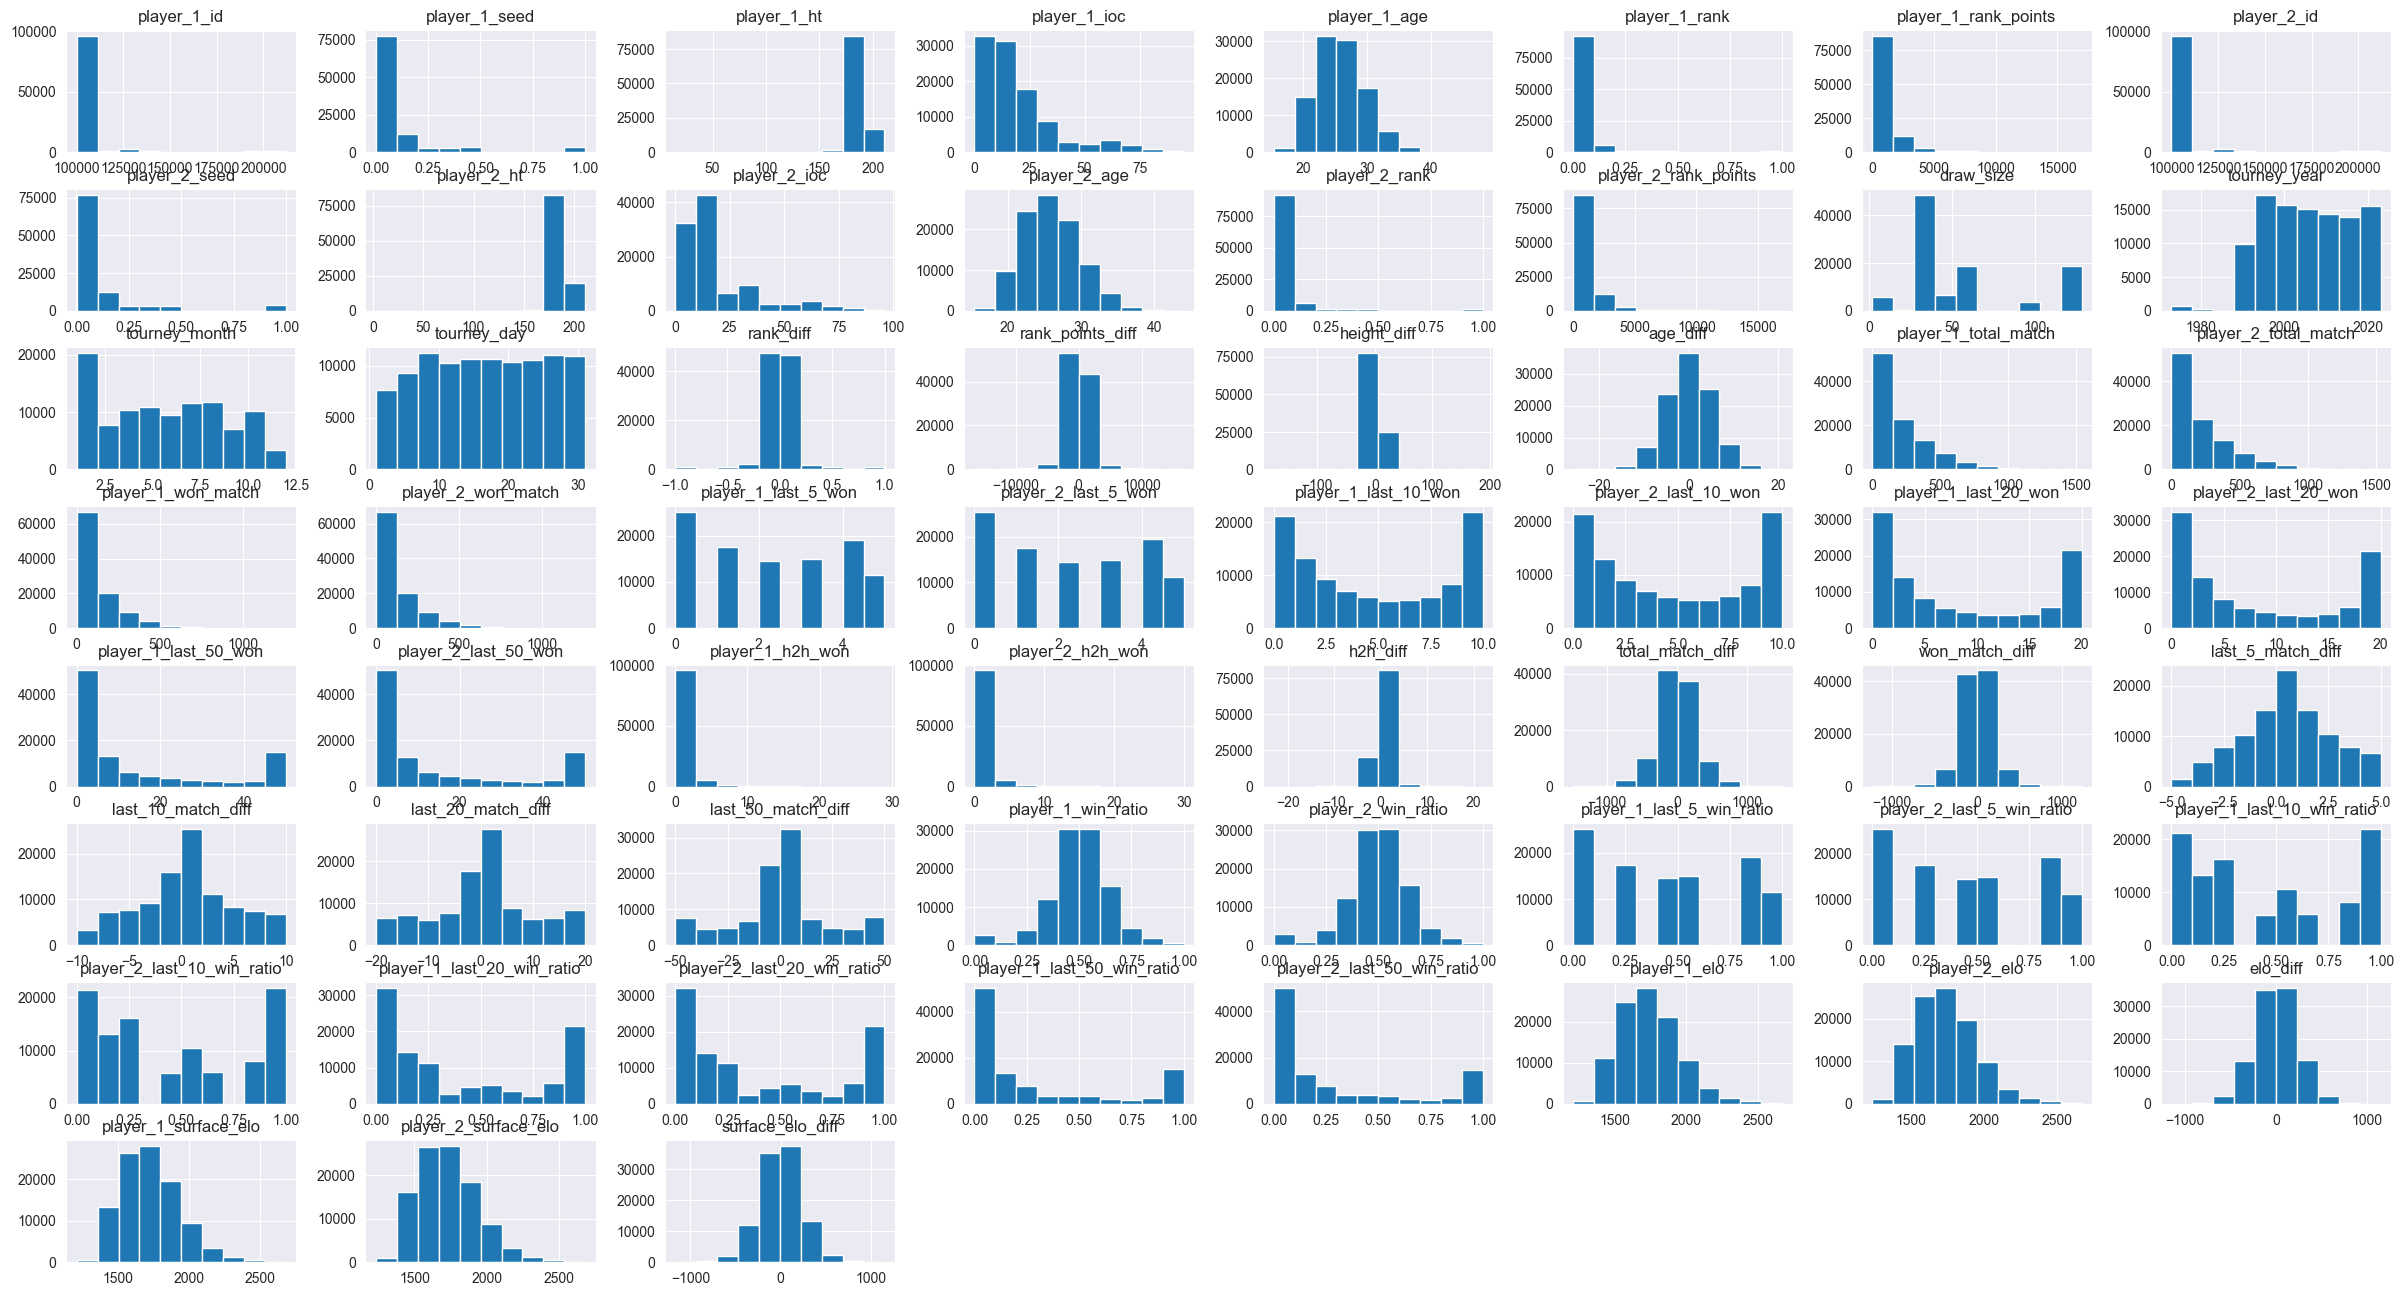

In [77]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(30, 16))

<Axes: >

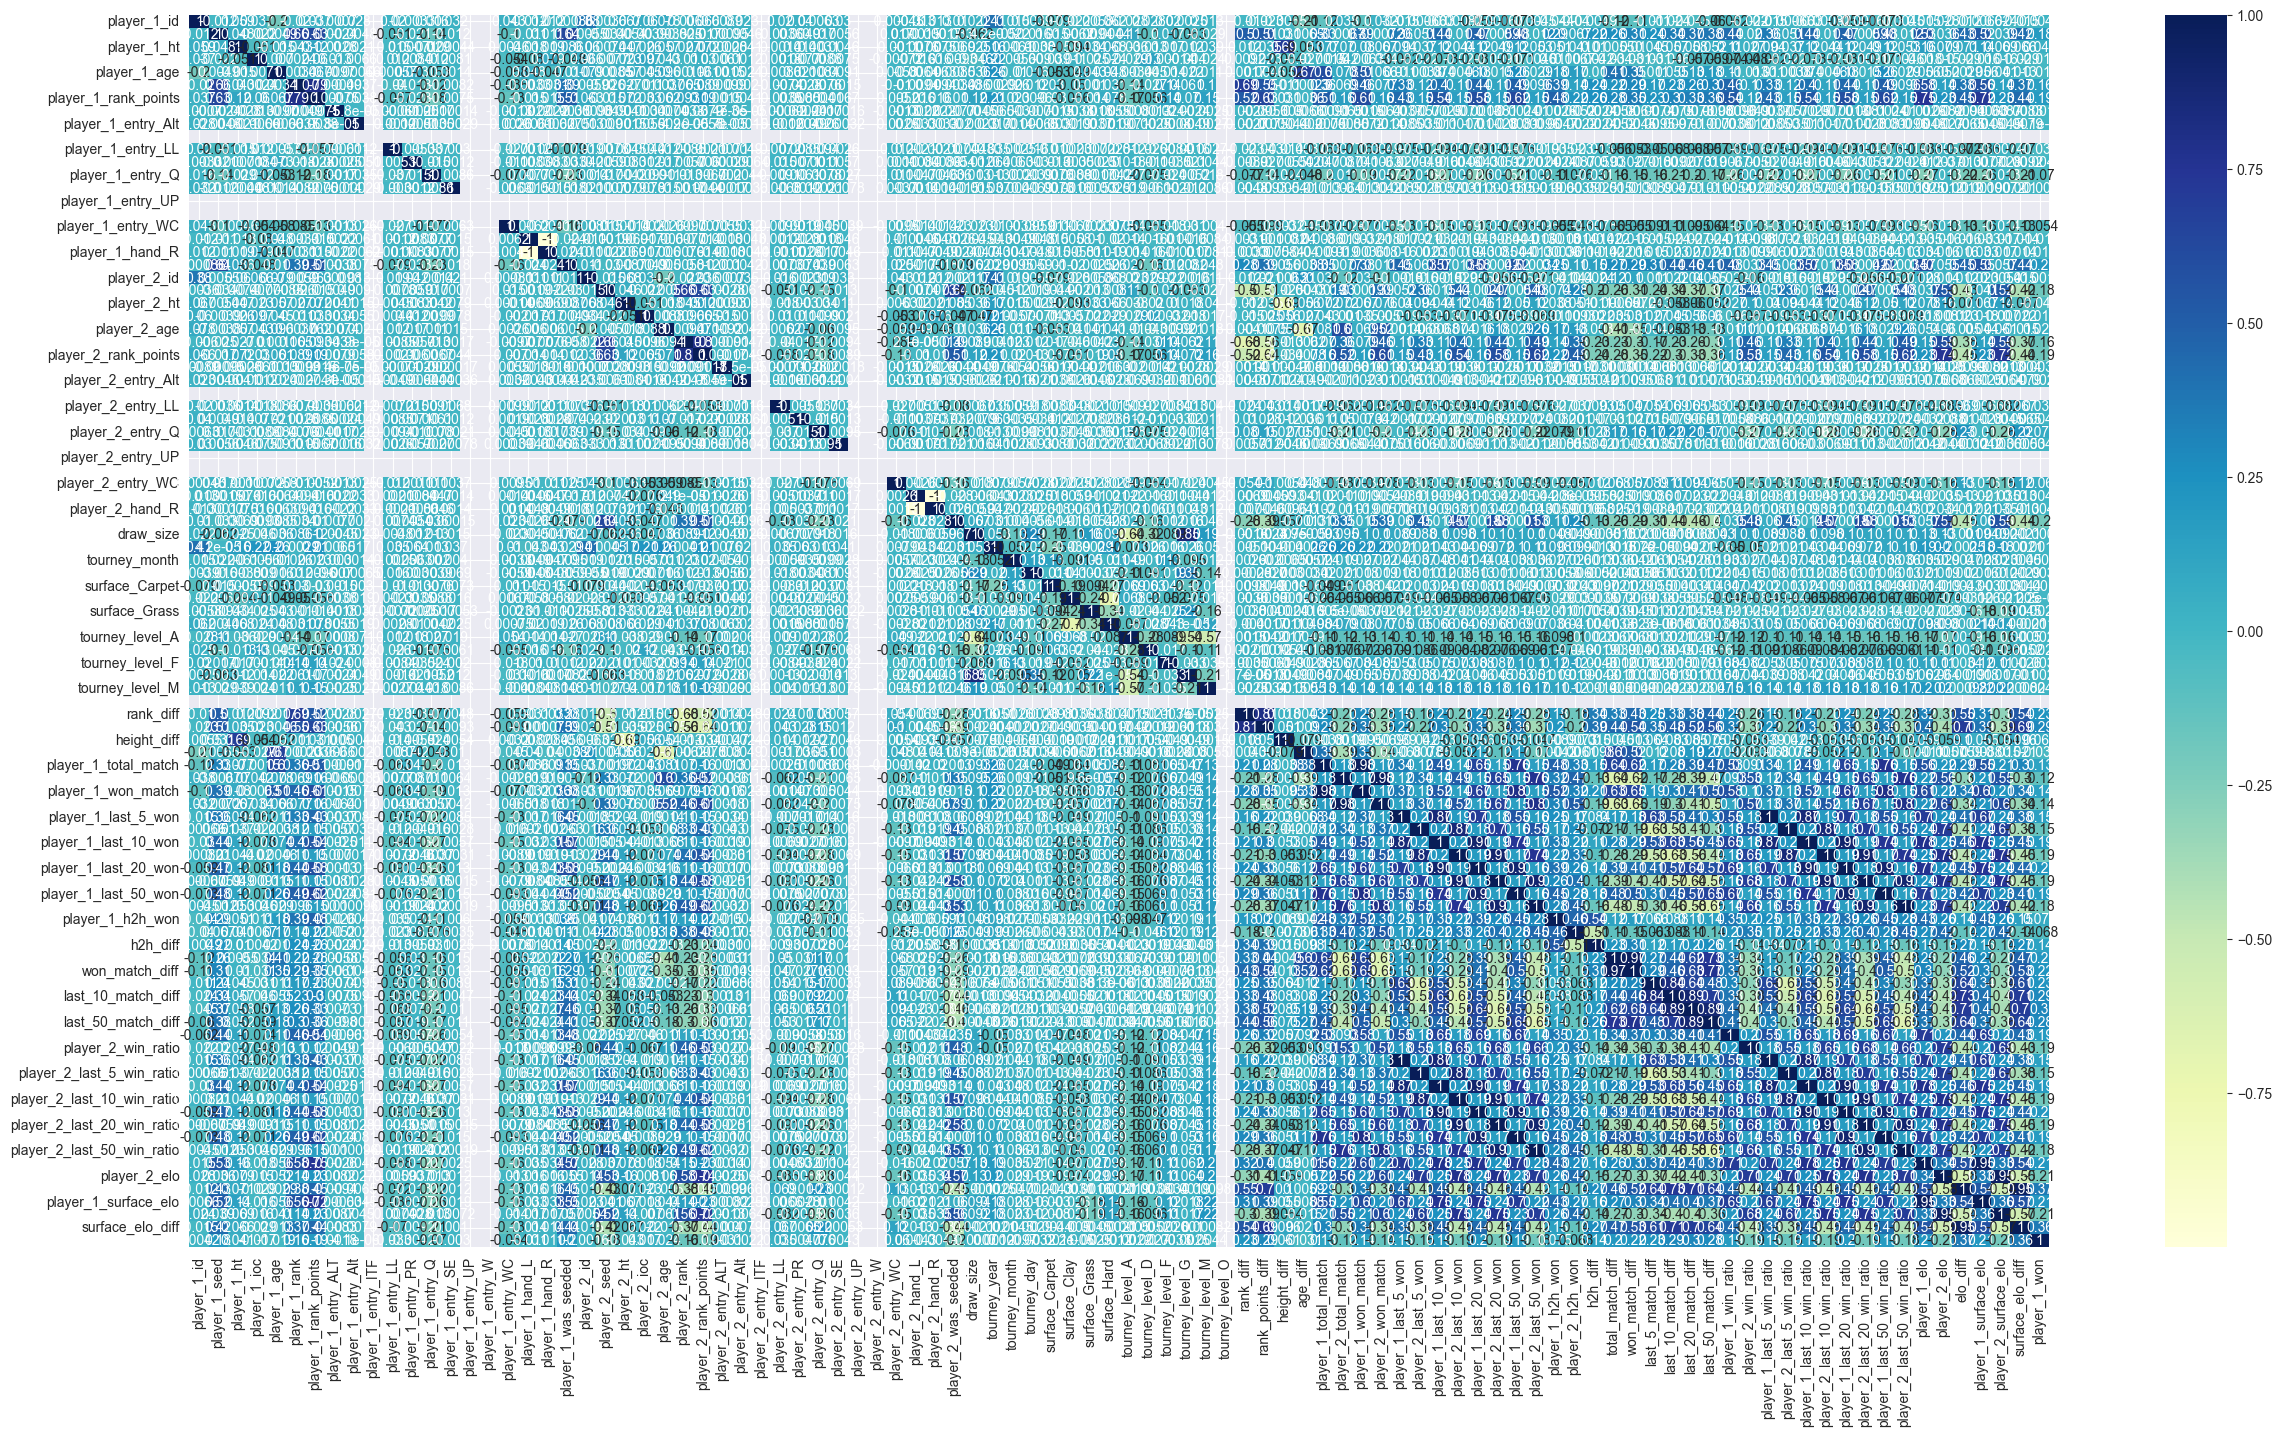

In [78]:
plt.figure(figsize=(30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
accuracy = forest.score(x_test, y_test)
print(f"Model Accuracy -> {accuracy *100}%")

Model Accuracy -> 63.2%


In [81]:
importances = forest.feature_importances_
feature_names = x.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

elo_diff: 4.360658028550304%
rank_diff: 3.9624006833704755%
surface_elo_diff: 3.946947388652586%
rank_points_diff: 3.6107979506759125%
player_2_rank_points: 2.4599542981882725%
won_match_diff: 2.4527241216437106%
player_2_surface_elo: 2.4468127948999343%
player_1_surface_elo: 2.427725027499533%
player_1_elo: 2.4217551772421237%
player_1_rank_points: 2.3356720391078554%
age_diff: 2.3275995869856594%
player_2_win_ratio: 2.3238617791250693%
player_2_elo: 2.3085653546393003%
player_1_rank: 2.269108700162286%
player_1_win_ratio: 2.2662685576146995%
player_2_rank: 2.2315380557466353%
player_2_age: 2.1666688871404043%
total_match_diff: 2.1536320303299235%
player_1_age: 2.1209626063736158%
player_2_id: 1.9727017611780502%
player_1_id: 1.9443858531112195%
player_2_total_match: 1.9397694962334722%
last_50_match_diff: 1.9361085425092233%
player_1_total_match: 1.9188942753958702%
player_2_won_match: 1.8414970146500584%
player_1_won_match: 1.8361997988981926%
tourney_day: 1.7869148162786734%
height

In [82]:
columns_to_keep = [feature for feature, importance in importance_list if importance > 0]
df = df.drop(columns=[column for column in df.columns if column not in columns_to_keep and column != "player_1_won"])

In [83]:
x_train = df[df["tourney_year"] < 2024].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < 2024]["player_1_won"]

x_test = df[df["tourney_year"] == 2024].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == 2024]["player_1_won"]

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

forest.score(x_test, y_test)

0.6393333333333333